In [5]:
library(Seurat)
#library(ggpubr)
o<-function(w,h) options(repr.plot.width=w, repr.plot.height=h)

Attaching SeuratObject

Attaching sp



# load batch1

In [3]:
load('./ABMaLP1_PP2.rda')
ls()

seu[[]]

[1] "seu"

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.1,RNA_snn_res.0.2,RNA_snn_res.0.3,RNA_snn_res.0.4,RNA_snn_res.0.5,seurat_clusters,doublet,pANN,pred.immgen.fine,pred.immgen.finepruned,pred.immgen.main,pred.immgen.mainpruned
,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
AAACCTGCAAATACAG,ABMaLP1,8625,2589,2.481159,1,1,6,8,9,9,Singlet,0.26153846,T cells (T.ISP),T cells (T.ISP),Tgd,Tgd
AAACCTGGTTGGTAAA,ABMaLP1,8557,2467,4.090219,1,1,1,0,0,0,Singlet,0.07692308,Stem cells (SC.CDP),Stem cells (SC.CDP),"B cells, pro","B cells, pro"
AAACCTGTCAGCGATT,ABMaLP1,18941,3686,2.708410,0,0,0,2,2,2,Singlet,0.20000000,T cells (T.DN2A),T cells (T.DN2A),Stem cells,Stem cells
AAACGGGCAAGTCTAC,ABMaLP1,6006,2101,3.063603,3,3,4,6,7,7,Singlet,0.06153846,DC (DC.PDC.8+),DC (DC.PDC.8+),"B cells, pro","B cells, pro"
AAACGGGGTACATCCA,ABMaLP1,5539,1722,1.570681,2,2,2,5,6,6,Singlet,0.01538462,ILC (ILC3.LTI.CD4-),ILC (ILC3.LTI.CD4-),ILC,ILC
AAACGGGGTAGCCTAT,ABMaLP1,5214,1627,3.068661,2,2,2,3,3,3,Singlet,0.00000000,ILC (ILC2),ILC (ILC2),ILC,ILC
AAACGGGTCGCCGTGA,ABMaLP1,10307,2433,3.628602,0,0,0,2,2,2,Singlet,0.03076923,T cells (T.ETP),T cells (T.ETP),Stem cells,Stem cells
AAAGATGAGCGCCTTG,ABMaLP1,14224,3118,3.536277,0,0,0,2,2,2,Singlet,0.12307692,T cells (T.ETP),T cells (T.ETP),Stem cells,Stem cells
AAAGATGCATATGCTG,ABMaLP1,11594,2843,2.225289,2,2,2,5,6,6,Singlet,0.15384615,Tgd (Tgd.mat.VG1+VD6+),Tgd (Tgd.mat.VG1+VD6+),ILC,ILC


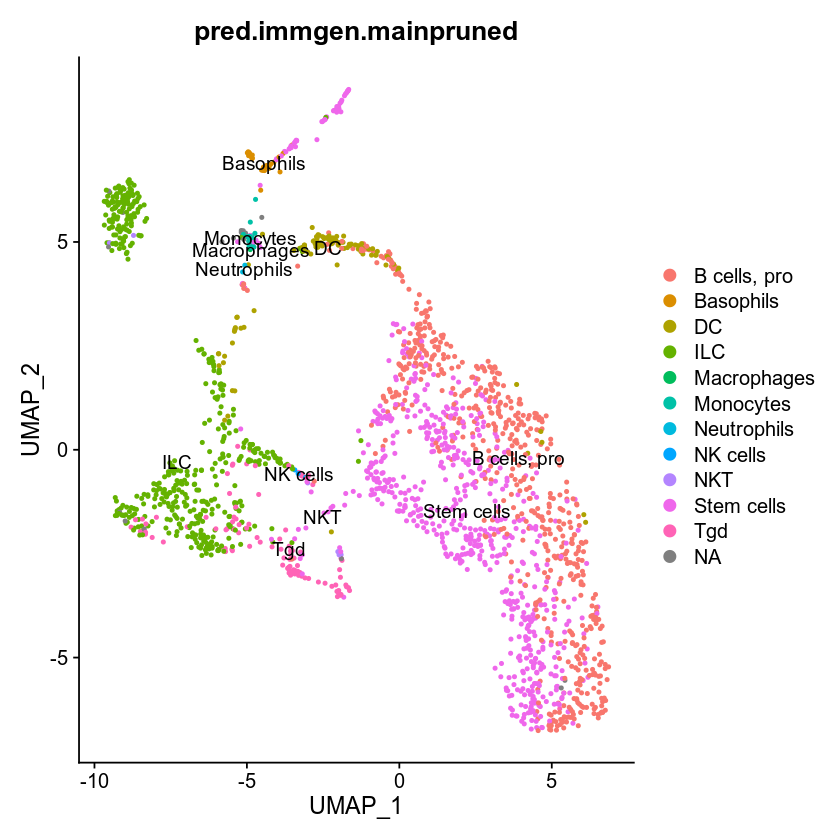

In [8]:
o(7,7)
DimPlot(seu, group.by='pred.immgen.mainpruned', label=T)

In [10]:
abm1=seu

# load batch2

In [11]:
library(reticulate)
sc <- import("scanpy")
adata <- sc$read_h5ad("220516-ABM.h5ad")
adata

## NOTE that if adata$X is a sparse matrix, t() will report an error. 
## consider densify the matrix first and then transpose
## `t(as.matrix(adata$X))`
## or use t_sp() provided by R package bayNorm if the matrix is really big
## # BiocManager::install("bayNorm")
## exprs <- bayNorm::t_sp(adata$X)
exprs <- t(adata$X)
colnames(exprs) <- adata$obs_names$to_list()
rownames(exprs) <- adata$var_names$to_list()

# Create the Seurat object
seurat <- CreateSeuratObject(exprs)

# Set the expression assay
seurat <- SetAssayData(seurat, "data", exprs)

# Add observation metadata
seurat <- AddMetaData(seurat, adata$obs)

# Add embedding
embedding <- adata$obsm["X_umap"]
rownames(embedding) <- adata$obs_names$to_list()
colnames(embedding) <- c("umap_1", "umap_2")
seurat[["umap"]] <- CreateDimReducObject(embedding, key = "umap_")

AnnData object with n_obs × n_vars = 3442 × 14521
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'pred.immgen.finepruned', 'pred.immgen.mainpruned', 'S_score', 'G2M_score', 'phase', 'ann0608'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'is_regulon_hub'
    uns: 'ann0608_colors', 'leiden', 'neighbors', 'pca', 'phase_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'counts_dca', 'normalized', 'normalized_alra', 'normalized_dca', 'normalized_magic', 'pyscenic_auc', 'pyscenic_bin', 'scaled', 'scaled_dca'
    obsp: 'connectivities', 'distances'

Warning message:
“No assay specified, setting assay as RNA by default.”


In [12]:
abm2=seurat

In [18]:
abm2[["orig.ident"]]<-'ABMaLP2'

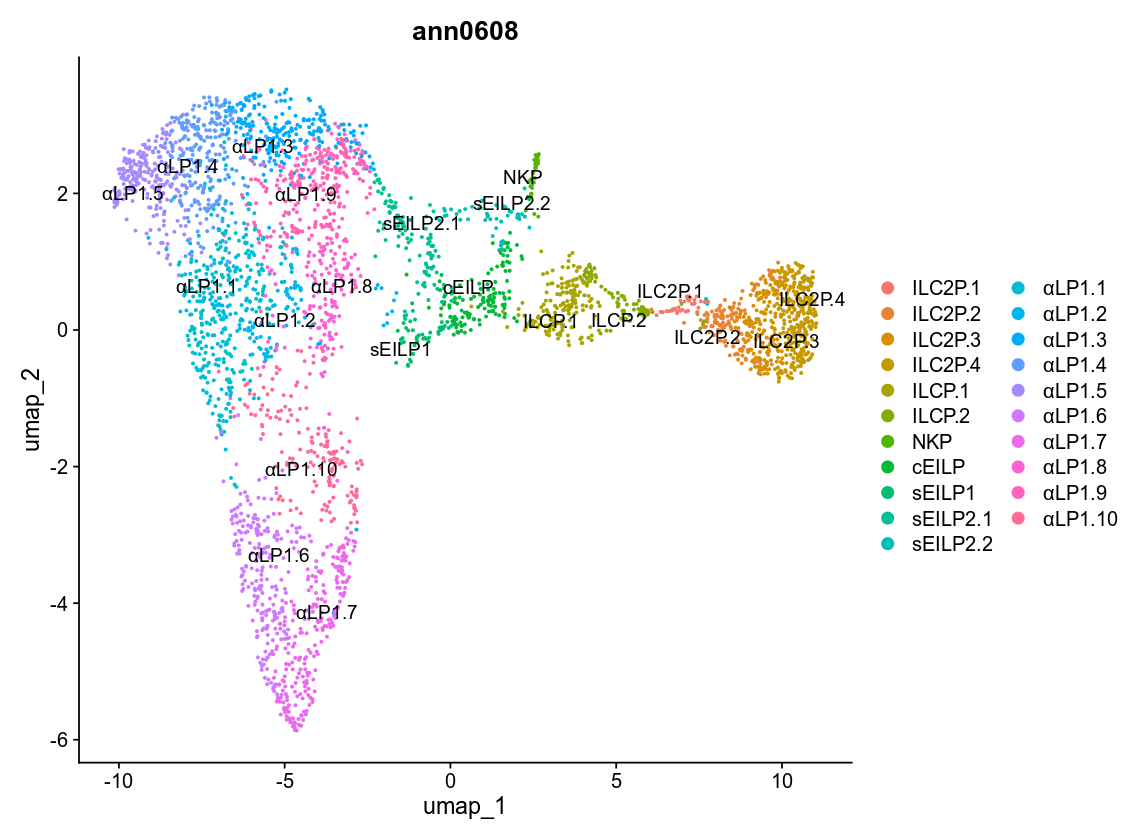

In [15]:
o(9.5,7)
DimPlot(abm2, group.by='ann0608',label=T,repel=T)

# transfer labels

In [19]:
abm1=FindVariableFeatures(abm1,selection.method = 'vst',nfeatures = 2000)
abm2=FindVariableFeatures(abm2,selection.method = 'vst',nfeatures = 2000)

abm1 = ScaleData(abm1, features = rownames(abm1))
abm2 = ScaleData(abm2, features = rownames(abm2))

abm1= RunPCA(abm1, npcs = 50, features = VariableFeatures(abm1),verbose = F)
abm2= RunPCA(abm2, npcs = 50, features = VariableFeatures(abm2),verbose = F)

abm.anchors <- FindTransferAnchors(reference = abm2, query = abm1, dims = 1:50, reference.reduction = "pca")

predictions <- TransferData(anchorset = abm.anchors, refdata = abm2$ann0608, dims = 1:30)
abm1 <- AddMetaData(abm1, metadata = predictions)


Centering and scaling data matrix

Centering and scaling data matrix

Projecting cell embeddings

Finding neighborhoods

Finding anchors

	Found 3201 anchors

Filtering anchors

	Retained 2826 anchors

Finding integration vectors

Finding integration vector weights

Predicting cell labels



In [20]:
abm1[['ann0608']] <- abm1[['predicted.id']]

In [21]:
ctable = c('#79de91', '#53c091', '#34989a', '#205070', '#b4bd00', '#77990f',
       '#fcda00', '#ef9708', '#d5a8e6', '#8f208d', '#f7693e', '#bb7784',
       '#651e3e', '#bec1d4', '#d6bcc0', '#d02727', '#5ca0d3', '#4a6fe3',
       '#005b96', '#679186', '#010059')
names(ctable)<-c('ILC2P.1','ILC2P.2','ILC2P.3','ILC2P.4','ILCP.1',
                 'ILCP.2','NKP','cEILP','sEILP1','sEILP2.1','sEILP2.2',
                 'αLP1.1','αLP1.2','αLP1.3','αLP1.4','αLP1.5','αLP1.6',
                 'αLP1.7','αLP1.8','αLP1.9','αLP1.10')

Warning message:
“ggrepel: 10 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


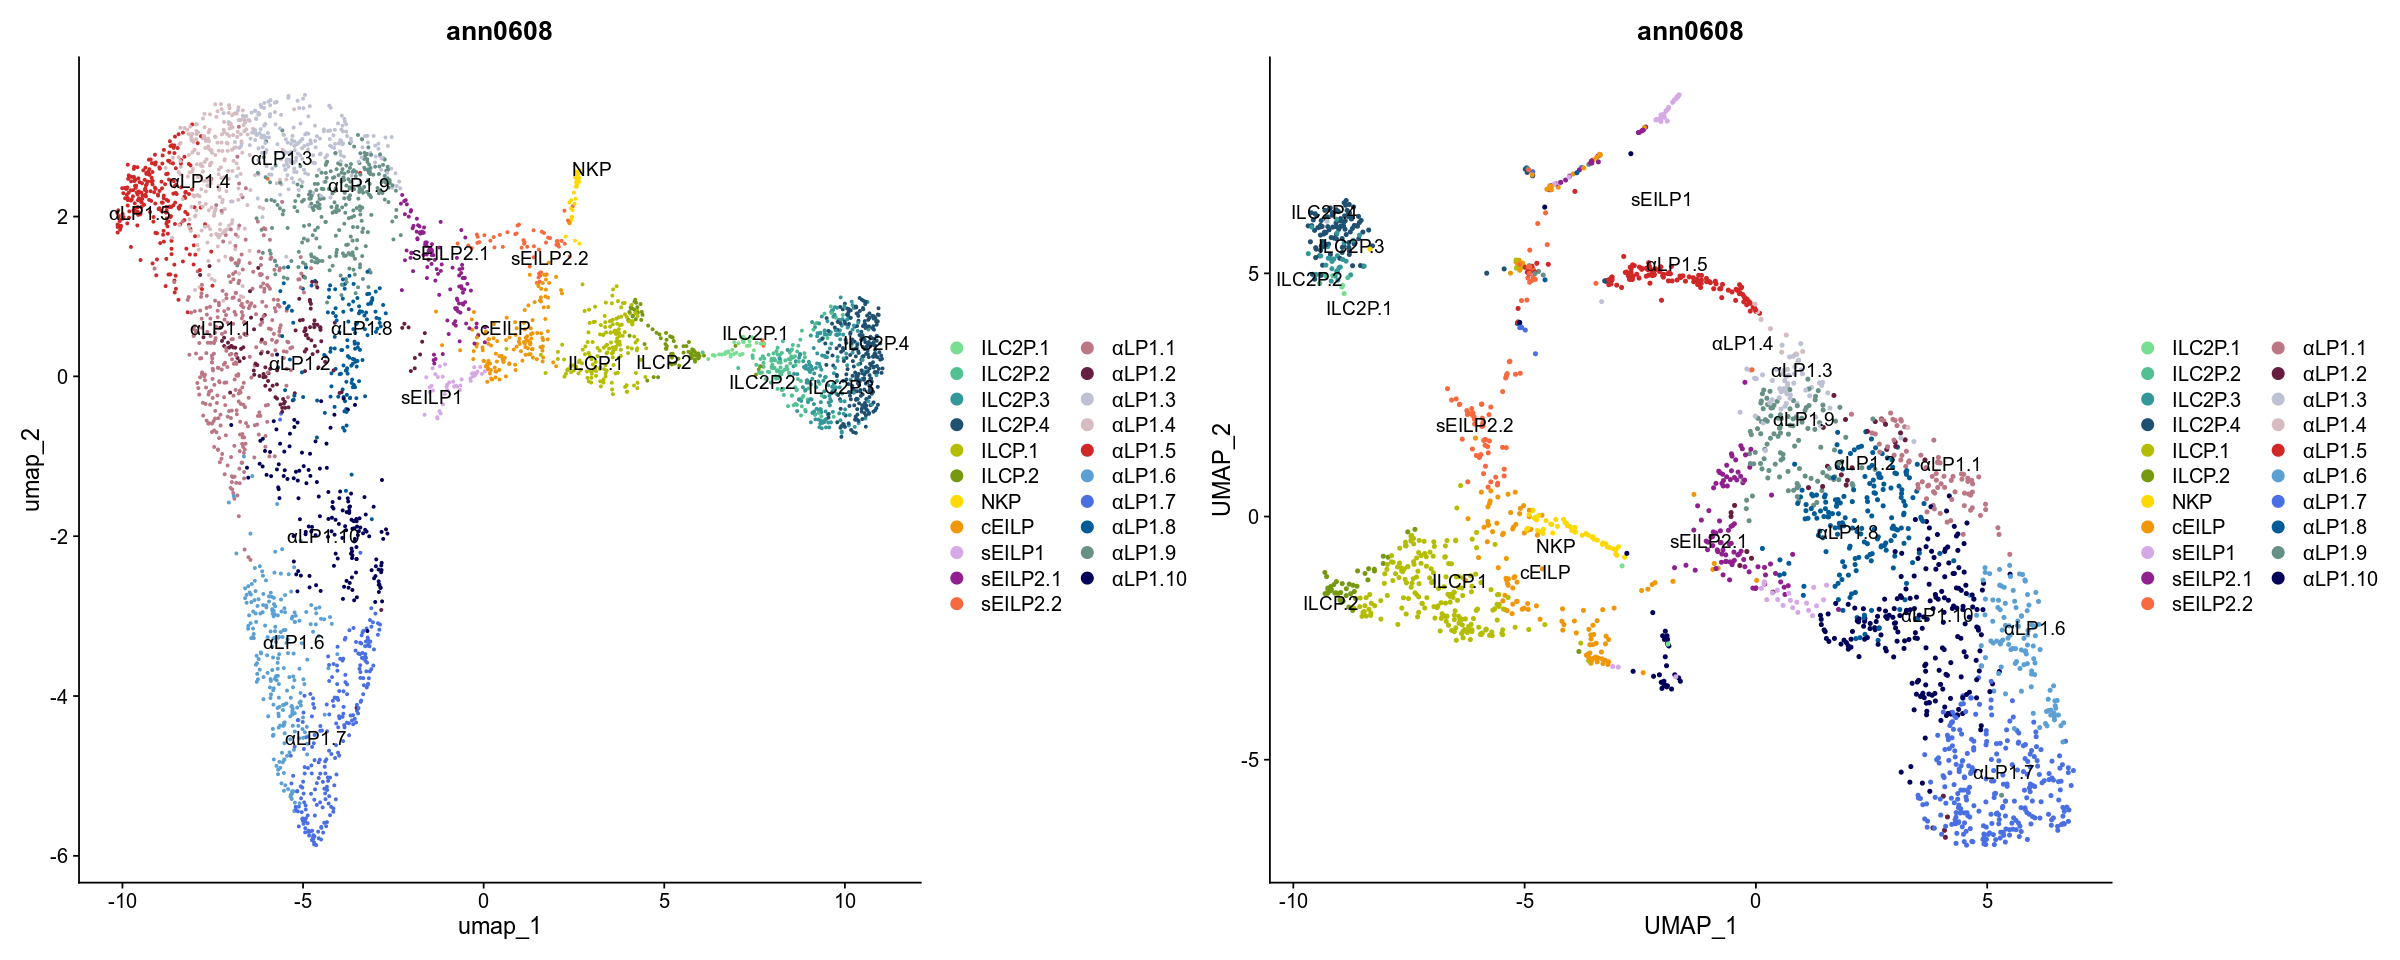

In [22]:
library(patchwork)
options(repr.plot.width=20, repr.plot.height=8)
DimPlot(abm2,group.by='ann0608', label=T, repel=T,cols = ctable)+
DimPlot(abm1, group.by='ann0608', label=T, repel=T, cols=ctable)

In [23]:
abm.list = list('batch1'=abm1, 'batch2'=abm2)
abm.int.features <- SelectIntegrationFeatures(object.list = abm.list)
abm.anchors <- FindIntegrationAnchors(object.list = abm.list, anchor.features = abm.int.features)
abm.combined <- IntegrateData(anchorset = abm.anchors)

Warning message in CheckDuplicateCellNames(object.list = object.list):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”
Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 6328 anchors

Filtering anchors

	Retained 4644 anchors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [24]:
DefaultAssay(abm.combined) <- "integrated"

# Run the standard workflow for visualization and clustering
abm.combined <- ScaleData(abm.combined, verbose = FALSE)
abm.combined <- RunPCA(abm.combined, npcs = 30, verbose = FALSE)
abm.combined <- RunUMAP(abm.combined, verbose=F,reduction = "pca", dims = 1:30)
abm.combined <- FindNeighbors(abm.combined, reduction = "pca", dims = 1:30)
abm.combined <- FindClusters(abm.combined,verbose=F, resolution = c(0.1,0.3,0.5,0.6,0.7,0.8,1.2,1.3,1.4,1.5))

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Computing nearest neighbor graph

Computing SNN



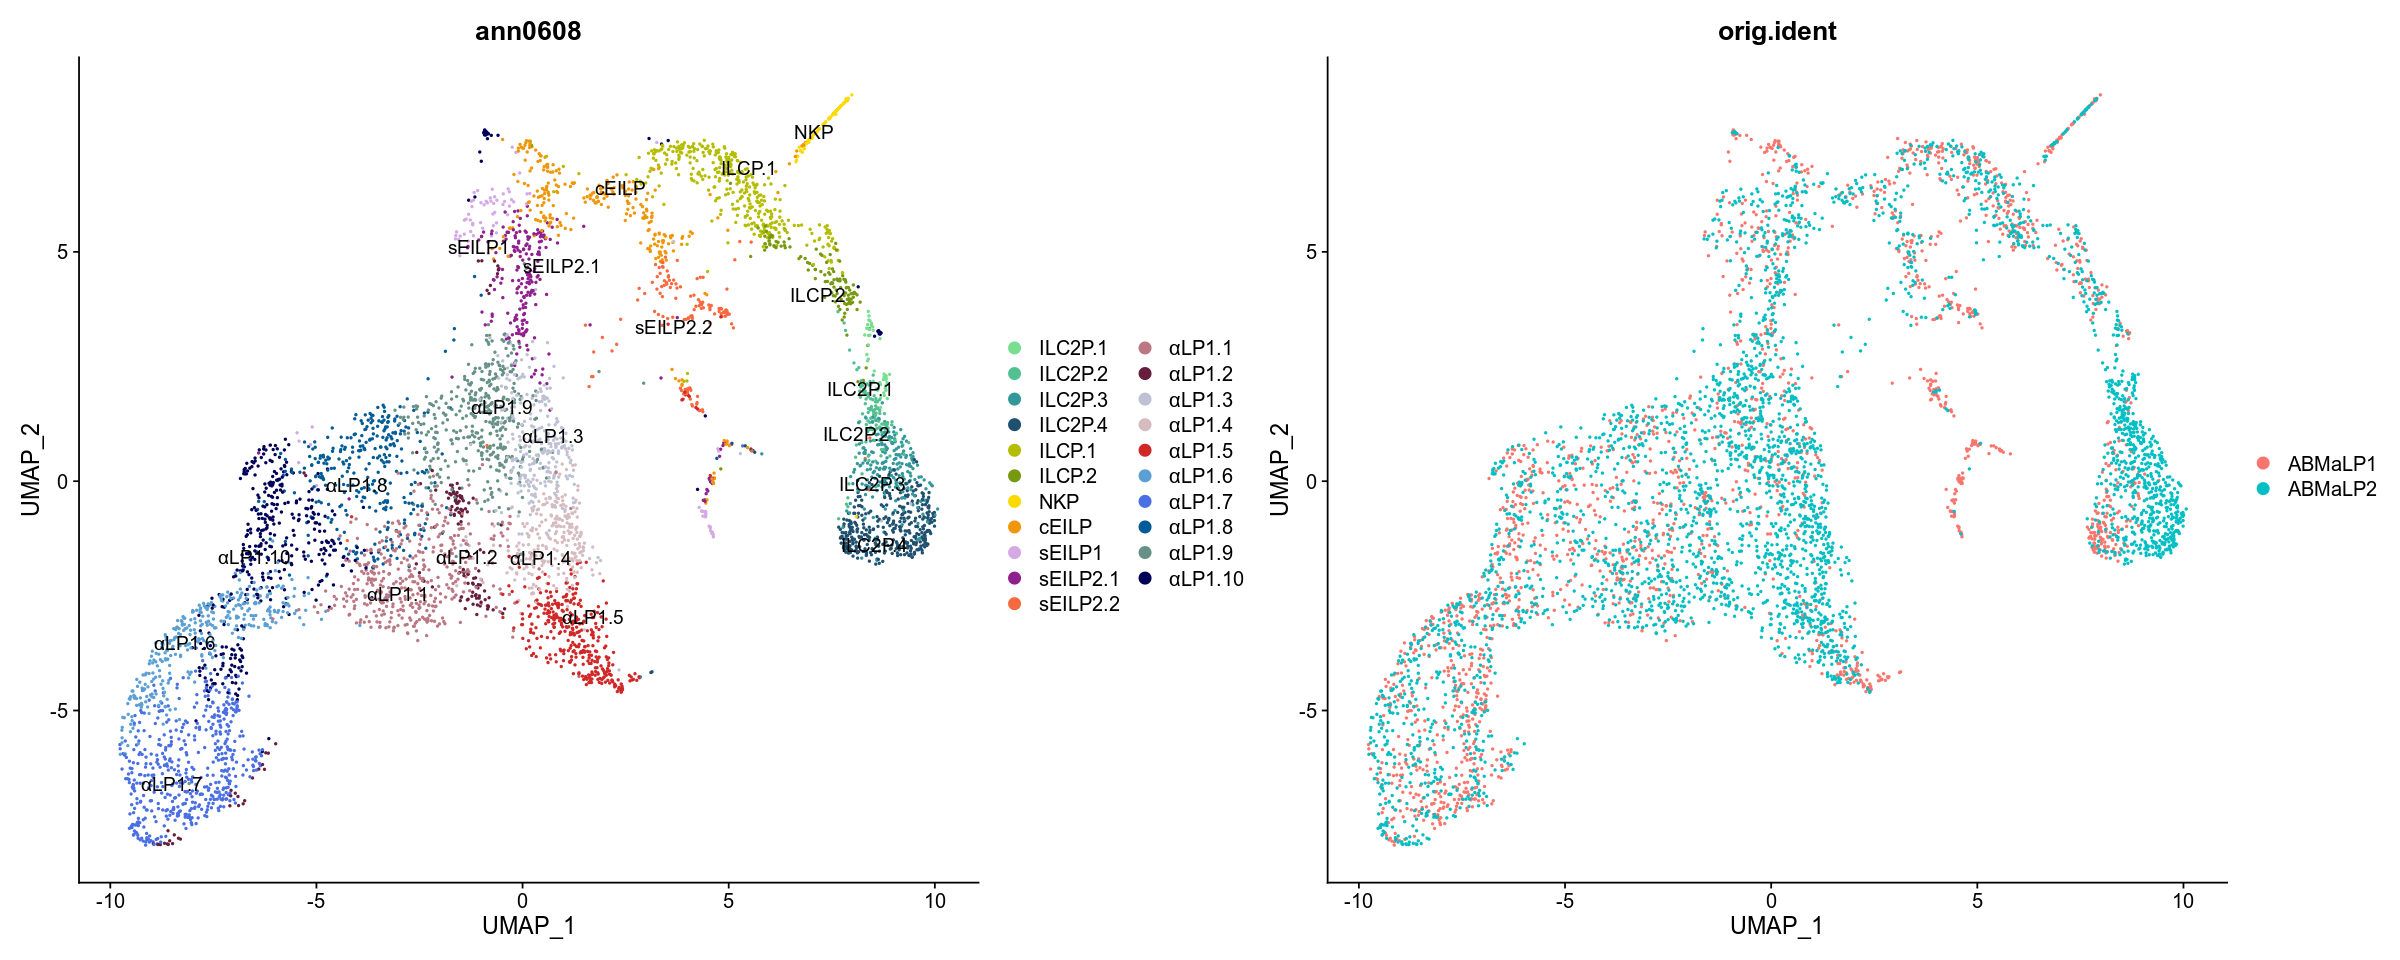

In [38]:
o(20,8)
DimPlot(abm.combined, group.by='ann0608',cols = ctable,label=T, repel=T)+
DimPlot(abm.combined, group.by = 'orig.ident')

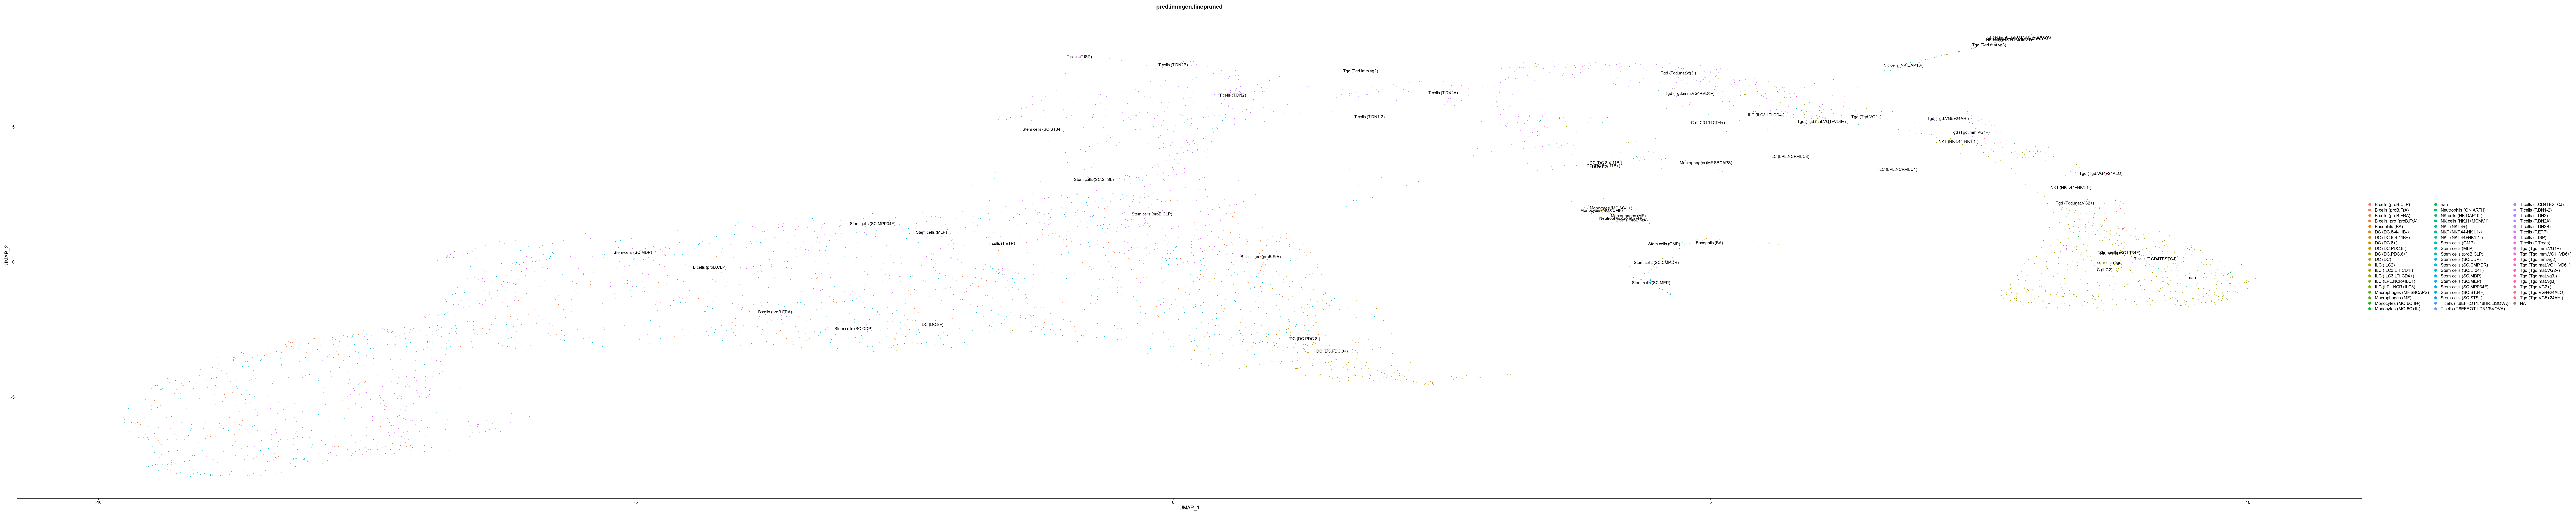

In [26]:
o(100,20)
DimPlot(abm.combined, group.by='pred.immgen.finepruned', ,label=T, repel=F)



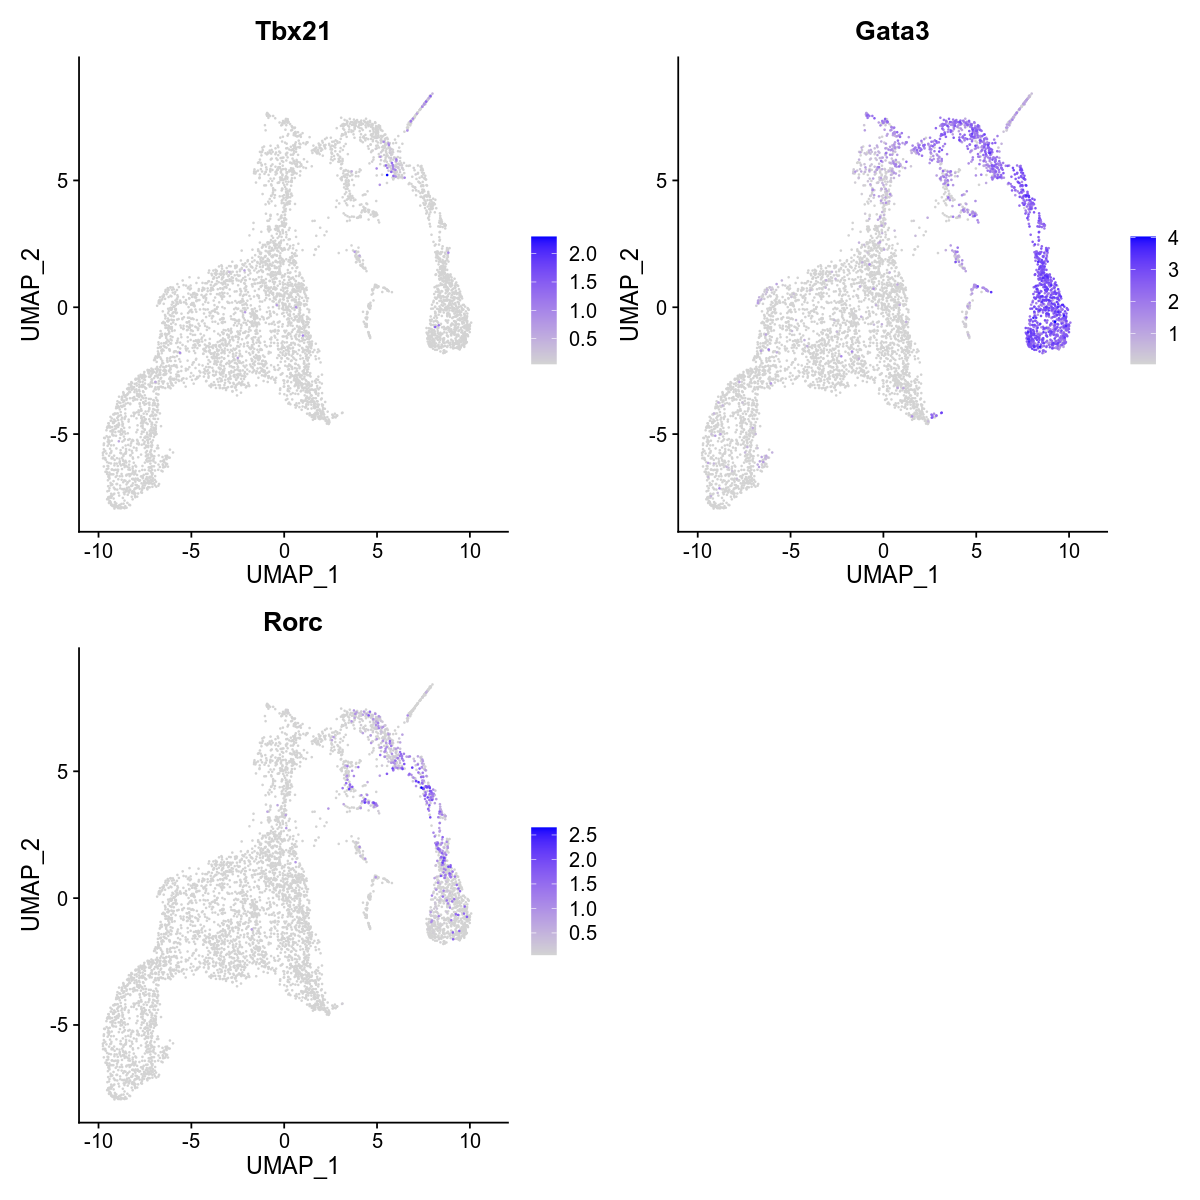

In [31]:
library(patchwork)
o(10,10)
DefaultAssay(abm.combined)<-'integrated'
FeaturePlot(abm.combined, features = c('Tbx21','Gata3','Rorc'),
            order=T, pt.size=0.1,min.cutoff = 0.05)

# save combined

In [32]:
save(abm.combined, file='220516-CombinedABM.rda')

In [33]:
library(reticulate)
use_python("/home/csj/anaconda3/envs/celltensor/bin/python", required = T)


In [35]:
sc <- import("scanpy")
seurat <- abm.combined
DefaultAssay(seurat)<-'RNA'


adata_seurat <- sc$AnnData(
    X   = t(as.matrix(GetAssayData(seurat,slot = 'counts'))),
    obs = seurat[[]],
    var = GetAssay(seurat)[[]]
)
adata_seurat$obsm$update(umap = Embeddings(seurat, "umap"))
sp <- import("scipy.sparse")
adata_seurat$X  <- sp$csc_matrix(adata_seurat$X)
adata_seurat

adata_seurat$write_h5ad("220516-CombinedABM.h5ad")

AnnData object with n_obs × n_vars = 5497 × 31053
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'seurat_clusters', 'doublet', 'pANN', 'pred.immgen.fine', 'pred.immgen.finepruned', 'pred.immgen.main', 'pred.immgen.mainpruned', 'predicted.id', 'prediction.score.αLP1.7', 'prediction.score.αLP1.9', 'prediction.score.αLP1.5', 'prediction.score.cEILP', 'prediction.score.αLP1.6', 'prediction.score.ILC2P.2', 'prediction.score.αLP1.8', 'prediction.score.αLP1.1', 'prediction.score.ILC2P.4', 'prediction.score.NKP', 'prediction.score.sEILP1', 'prediction.score.ILC2P.1', 'prediction.score.αLP1.4', 'prediction.score.αLP1.3', 'prediction.score.ILC2P.3', 'prediction.score.αLP1.10', 'prediction.score.ILCP.1', 'prediction.score.sEILP2.1', 'prediction.score.αLP1.2', 'prediction.score.sEILP2.2', 'prediction.score.ILCP.2', 'prediction.score.max', 'ann0608', 'S_score', 'G2M_score', 'phase', 'i

In [36]:
write.csv(abm.combined[[]], file='abm1_abm2.meta.csv')